# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

#### Описание данных.

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — общая площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

# 1. Откройте файл с данными и изучите общую информацию. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Выведем первые 5 строк, чтобы ознакомиться с датасетом и методом info() изучим информацию о датасете.

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим диаграмму для всех числовых столбцов таблицы.

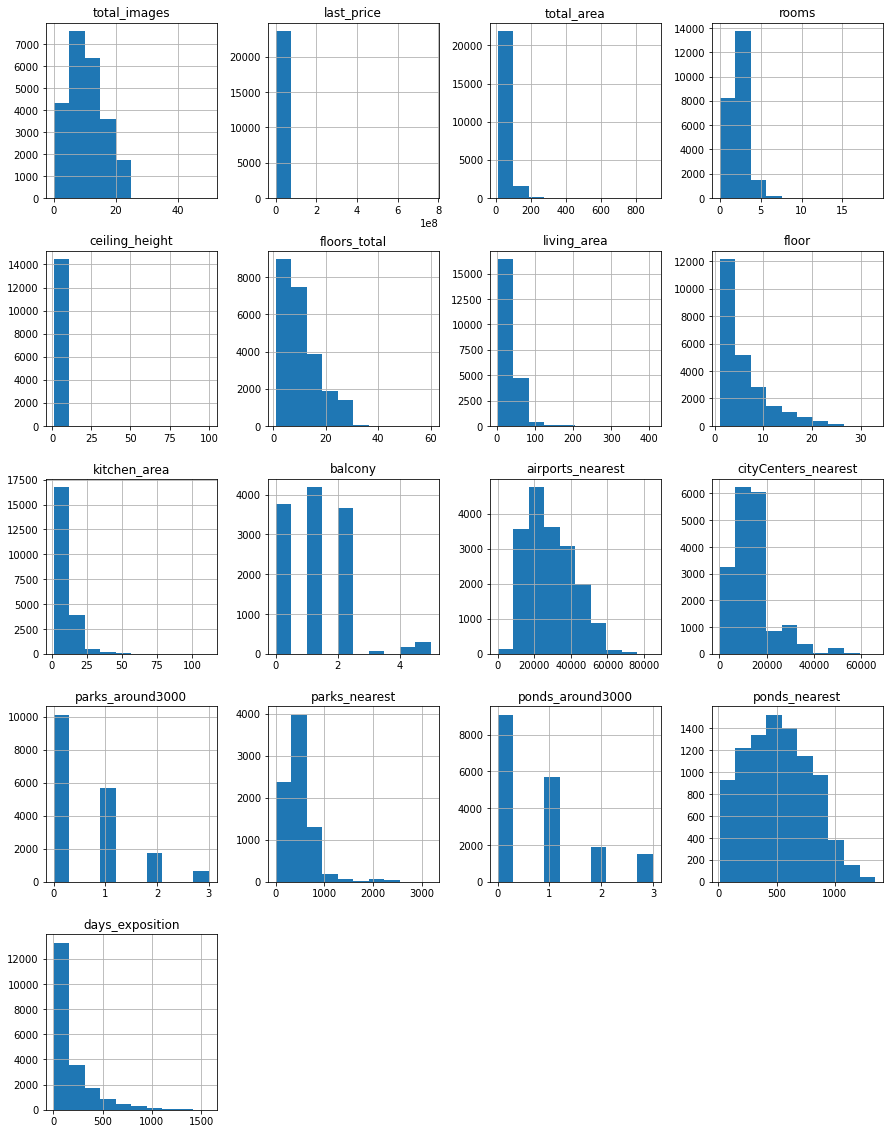

In [ ]:
data.hist(figsize=(15, 20))
plt.show()

<div class="alert alert-info">
<b>Вывод</b>
    
Мы провели знакомство с датасетом - посмотрели какие есть атрибуты, ознакомились непосредственно с данными в таблице, посмотрели на типы данных столбцов, ознаокмились с их визуальным представлением. На первый взгляд требуется небольшая предобработка данных - поправить тип данных и более точнее изучить данные в каждом из столбцов, чтоб ознакомиться с выбросами, замеченными на гистограммах.
</div>

# 2. Предобработка данных

**Для начала приведем данные к верному типу данных.**

- Столбцы floors_total (всего этажей в дома), balcony (число балконов), days_exposition (сколько дней было размещено объявление), parks_around3000 и ponds_around3000 должны иметь тип int, так как предполагают целое число в значении.

- Столбец is_apartment (апартаменты) должен иметь булев тип.

- Столбец first_day_exposition ( дата публикации) должен иметь тип "дата".


In [ ]:
data['is_apatrment'] = data['is_apartment'].astype('bool')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

Для того, чтоб привести к целочесленному значению остальные столбцы необходимо для начала избавиться от пропусков.

Посчитаем количество пропусков в каждом столбце. 

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
is_apatrment                0
dtype: int64

Пропуски есть в 14 столбцах из датасета. Рассмотрим внимательнее, что это за столбцы и чем могут быть вызваны пропуски в них и как можно их заполнить.

Рассмотрим столбецы, в которых есть пропущенные значения: 

- ceiling_height - высота потолков (м)
- floors_total- всего этажей в доме
- living_area - жилая площадь в квадратных метрах (м²)
- is_apartment - апартаменты (булев тип)
- kitchen_area - площадь кухни в квадратных метрах (м²) 
- balcony - число балконов
- locality_name - название населённого пункта
- airports_nearest - расстояние до ближайшего аэропорта в метрах (м)
- cityCenters_nearest - расстояние до центра города (м)
- parks_around3000 - число парков в радиусе 3 км
- parks_nearest - расстояние до ближайшего парка (м)
- ponds_around3000 - число водоёмов в радиусе 3 км
- ponds_nearest - расстояние до ближайшего водоёма (м)
- days_exposition - сколько дней было размещено объявление (от публикации до снятия)

Посчитаем сколько всего данных есть в нашем датасете, чтобы понять на сколько сильно пропуски данных могут искажать аналитику.

In [ ]:
print("Количество строк в датасете:", len(data))

Количество строк в датасете: 23699


Для столбцов balcony, parks_around3000, ponds_around3000 можно допустить, что эти данные не заполнены в силу того, что владельцы объявления осталяли это поле пустым в силу того, что не имели балкона, парка или пруда.

Заменим такие пропущенные значения на 0.

In [ ]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [ ]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
is_apatrment                0
dtype: int64


Теперь можем привести данные значения в целочисленный вид.

In [ ]:
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int32')
data['ponds_around3000'] = data['ponds_around3000'].astype('int32')

Проверяем.

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
is_apatrment                0
dtype: int64

В 11 ячейках все еще остаются пропуски в значениях. Разберемся, почему могли возникнуть пропущенные значения.

Большая часть значений имеет численный характер. Например, расстояние до ближайшего аэропорта, центра города, парка или пруда люди могут либо не знать, либо поблизости просто нет этих объектов, чтоб указать расстояние для них за счет чего люди могут оставлять эти поля пустыми. 

Большое количество пропущенных значений имеет столбец с булевым типом, обозначающий признак апартаментов. Такой пропуск может быть вызван либо человеческим фактором (например, сдаваемое жилье не является апартаментами и человек не знал как это указать), либо техническим фактором (проблемы с указанием типа сдаваемого жилья). Пропуски в столбцах с размерами жилья или кухни тоже скорее всего возникли из-за человеческого фактора, когда хозяева не могли точно знать размеры сдаваемой площади.

Пропуски в столбце ceiling_height можно заполнить средним значением. Для этого посмотрим на данные, так как на графике было видно, что есть аномально большие значения.

In [ ]:
 data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Можем заметить, что есть такие нетипичные значения, как 14, 27.5, 32, 27, 26, 22.6, 24, 100, 20, 25.
Скорее всего при заполнении данного поля были ошибки в проставлении дробной части.

Сравним медианное значение высоты потолков и среднее, чтоб посмотреть на сколько сильно они теперь отличаются, когда мы убрали значения - выбросы.

In [ ]:
print('Медианное значение высоты потолков:', data['ceiling_height'].median())
print('Среднее значение высоты потолков:', data['ceiling_height'].mean())

Медианное значение высоты потолков: 2.65
Среднее значение высоты потолков: 2.77149889685604


Заполним пропуски медианным значением.

In [ ]:
medianhight = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(medianhight)

Посчитаем сколько строк с аномальными значениями, чтоб понять, сможем ли мы удалить их.

In [ ]:
rows2 = data.query('ceiling_height > 5')
print('Количество аномальных значений:', len(rows2))

Количество аномальных значений: 36


Удалим строки с выбросами.

In [ ]:
data = data.loc[data['ceiling_height'] < 5]

**Повторим ту же проверку для столбца floors_total**

In [ ]:
 data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

В данном столбце нет выбросов. Есть достаточно большие значения по типу 60, но как известно, число этажей самого высокого здания Москвы - 70, поэтому ничего удалять не будем. Пропусков в данных не так много, так что заполним их 0.

In [ ]:
data['floors_total'] = data['floors_total'].fillna(0)

In [ ]:
data['floors_total'] = data['floors_total'].astype('int')

**Повторим ту же проверку для столбца living_area**

In [ ]:
 data['living_area'].unique()

array([51.  , 18.6 , 34.3 , ..., 31.65, 13.59, 42.55])

In [ ]:
data['living_area'].describe()

count    21762.000000
mean        34.439884
std         21.983337
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Минимальное значение площади сдаваемого объекта 2 квадратных метра. Это достаточно малое значение, возможно, при указании прощади жилья была допущена ошибка из-за человеческого фактора. Посмотрим, сколько значений жилой площади меньше 10 квадратных метров.

In [ ]:
rows2 = data.query('living_area < 10')
print('Количество аномальных значений:', len(rows2))

Количество аномальных значений: 25


Так как минимальное значение площади равно 2, а максимальное 409.7, то считать среднее для заполнения пропусков будет неверным. Поэтому заполним пропущенные значения медианным значением.

In [ ]:
medianarea = data['living_area'].median()
data['living_area'] = data['living_area'].fillna(medianarea)

Теперь удалим строки с слишком маленькими значениями из датасета.

In [ ]:
data = data.loc[(data['living_area'] > 10)]

**Проведем проверку для столбца is_apartment**

Посмотрим еще раз сколько пропущенных значений в данном столбце.

In [ ]:
print(data['is_apartment'].isna().sum())

20845


Почти во всех строках пропущена отметка с типом жилья. Можно предположить, что данная графа в анкете была не обязательной и пользователи, чей тип не апартаменты просто пропускали данную графу. Исходя из этого, отметим все пропуски как тип "не апартаменты", то есть False.

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)

**Проведем проверку для столбца kitchen_area**

In [ ]:
data['kitchen_area'].describe()

count    21352.000000
mean        10.555992
std          5.887043
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Минимальное значение размера кухни 1,3 метра. На первый взгляд значение достаточно маленькое, но не на столько, чтоб считать, что оно стоит удаления. Пропуски заполним медианным значением.

In [ ]:
mediankitchen = data['kitchen_area'].median()
data['kitchen_area'] = data['kitchen_area'].fillna(mediankitchen)

**Столбец locality_name мы изменить никак не можем, поэтому просто оставим пропуски.
Столбцы с расстоянием до ближайшего аэропорта, центра города,  парка или пруда заполнить мы не можем, так как скорее всего они не заполнены из-за отсутствия этих объектов**

Посмотрим на значения в столбце locality_name,чтоб избежать дубликатов в данных.

In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Ознакомившись с данными, можем заметить несколько моментов, которые могут вызывать проблемы:
- буквы е и ё в словах - где-то используется поселок, где-то посёлок.
- разные обозначения поселка

Посчитаем количество уникальный значений, исправим все буквы ё на е, исправим "городской поселок" на "поселок городского типа".

In [ ]:
print(len(data['locality_name'].unique()))

364


In [ ]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

In [ ]:
#Посчитаем количество уникальных значений после изменений
print(len(data['locality_name'].unique()))

323


**Проведем последнюю обработку данных - посмотрим на возможные выбросы в значениях более подробно**

Для каждого из столбцов посмотрим его минимальное и максимальное значение и построим гистограмму, чтоб посмотреть на сколько эти значения выбиваются из общиго количества.

##### total_images (число фотографий квартиры в объявлении)

In [ ]:
data['total_images'].describe()

count    23604.000000
mean         9.857524
std          5.680516
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

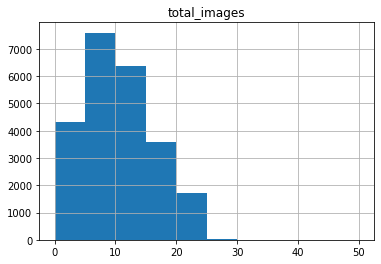

In [ ]:
data.hist('total_images', bins = 10)
plt.show()

Максимальное число фотографий в объявлении 50 - довольно большое количество, но таких значений не так много и они не должны повлиять на аналитику.

##### last_price (цена на момент снятия с публикации)

In [ ]:
data['last_price'].describe()

count    2.360400e+04
mean     6.530335e+06
std      1.081847e+07
min      1.219000e+04
25%      3.420000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

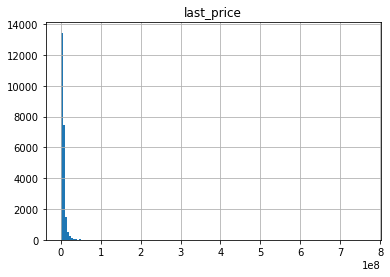

In [ ]:
#data['last_price'].hist(bins = 10) - старое
data.hist('last_price', bins = 150)
plt.show()

Есть значения, превышающие намного медианную стоимость жилья. Такие выбросы могут повлиять на кочество аналитики, поэтому удалим строки с чрезмерно большой стоимостью.

In [ ]:
data = data.loc[(data['last_price'] < 0.2e+08)]

In [ ]:
data['last_price'].describe()

count    2.288700e+04
mean     5.417783e+06
std      3.200975e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      1.999900e+07
Name: last_price, dtype: float64

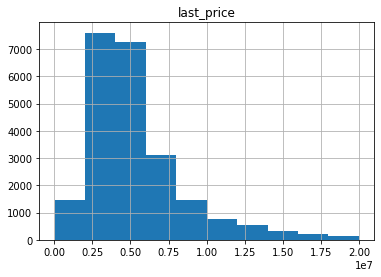

In [ ]:
#data['last_price'].hist(bins = 10) - старое
data.hist('last_price', bins = 10)
plt.show()

##### total_area (общая площадь квартиры в квадратных метрах (м²))

In [ ]:
data['total_area'].describe()

count    22887.000000
mean        56.738364
std         24.617405
min         13.000000
25%         40.000000
50%         51.000000
75%         67.200000
max        320.000000
Name: total_area, dtype: float64

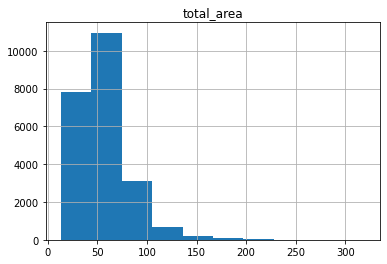

In [ ]:
#data['total_area'].hist()
data.hist('total_area', bins = 10)
plt.show()

Максимальное значение через чур большое, поэтому ограничим выборку данных метражем в 200 метров.

In [ ]:
#data = data.loc[(data['total_area'] < 400)]

##### rooms  (число комнат)

In [ ]:
data['rooms'].describe()

count    22887.000000
mean         2.011928
std          0.984893
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

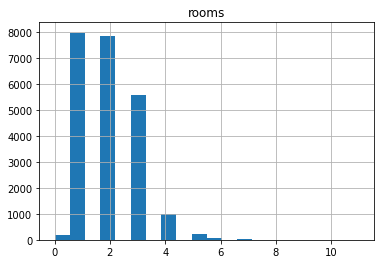

In [ ]:
#data['rooms'].hist()
data.hist('rooms', bins = 20)
plt.show()

Минимальное число комнат - 0. Такое значение могло получиться у квартир-студий, поэтому не будем считать его за выброс.

##### ceiling_height (высота потолков (м))

In [ ]:
data['ceiling_height'].describe()

count    22887.000000
mean         2.685880
std          0.200178
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

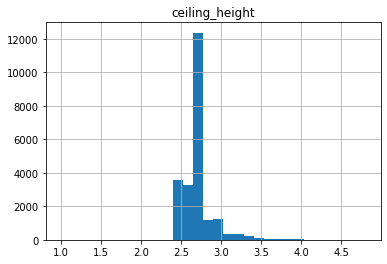

In [ ]:
#data['ceiling_height'].hist()
data.hist('ceiling_height', bins = 30)
plt.show()

Посчитаем количество квартир с потолком ниже 2 метров.

In [ ]:
onemeter = data.query('ceiling_height < 2')
print(len(onemeter['ceiling_height']))

3


Таких квартир не очень много, поэтому можем удалить данные строки.

In [ ]:
data = data.loc[(data['ceiling_height'] > 2)]

In [ ]:
data['ceiling_height'].describe()

count    22873.000000
mean         2.686389
std          0.199023
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

##### floors_total (всего этажей в доме)

In [ ]:
data['floors_total'].describe()

count    22873.000000
mean        10.699908
std          6.646308
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

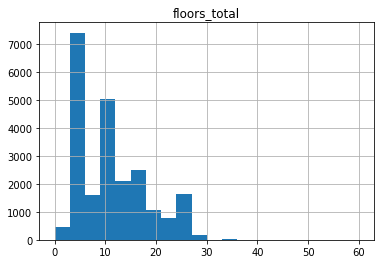

In [ ]:
#data['floors_total'].hist()
data.hist('floors_total', bins = 20)
plt.show()

С данным столбцом мы работали уже ранее, поэтому данные уже не имеют выбросов.

##### living_area (жилая площадь в квадратных метрах (м²))

In [ ]:
data['living_area'].describe()

count    22873.000000
mean        32.394568
std         16.004122
min         10.080000
25%         19.000000
50%         30.000000
75%         40.000000
max        199.000000
Name: living_area, dtype: float64

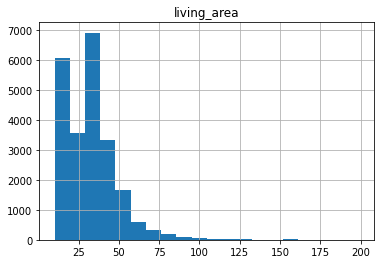

In [ ]:
#data['living_area'].hist()
data.hist('living_area', bins = 20)
plt.show()

С данным столбцом мы работали уже ранее, поэтому данные уже не имеют выбросов.

##### floor (этаж)

In [ ]:
data['floor'].describe()

count    22873.000000
mean         5.895029
std          4.901678
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

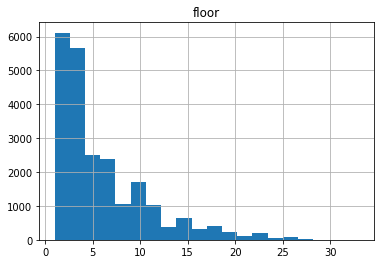

In [ ]:
#data['floor'].hist()
data.hist('floor', bins = 20)
plt.show()

В данном столбце можем увидеть, что максимальное значение этажа - 33. Как мы уже решили ранее, максимальный этаж в данных - 60. Поэтому посчитаем, что в данных нет аномальных значений.

##### kitchen_area (площадь кухни в квадратных метрах (м²))

In [ ]:
data['kitchen_area'].describe()

count    22873.000000
mean        10.009730
std          4.493851
min          1.300000
25%          7.200000
50%          9.100000
75%         11.000000
max        100.700000
Name: kitchen_area, dtype: float64

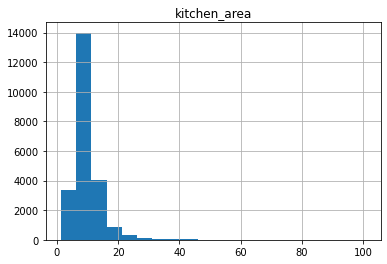

In [ ]:
#data['kitchen_area'].hist()
data.hist('kitchen_area', bins = 20)
plt.show()

С данным столбцом мы работали уже ранее, поэтому данные уже не имеют выбросов.

##### balcony (число балконов)

In [ ]:
data['balcony'].describe()

count    22873.000000
mean         0.592358
std          0.954664
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

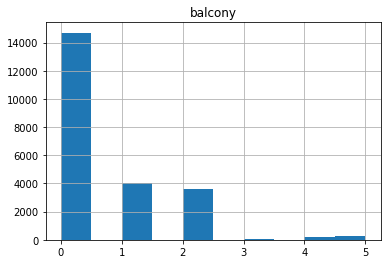

In [ ]:
#data['balcony'].hist()
data.hist('balcony', bins = 10)
plt.show()

С данным столбцом мы работали уже ранее, поэтому данные уже не имеют выбросов.

##### airports_nearest (расстояние до ближайшего аэропорта в метрах (м))

In [ ]:
data['airports_nearest'].describe()

count    17384.000000
mean     28844.450932
std      12794.426248
min          0.000000
25%      18410.750000
50%      26806.500000
75%      37434.000000
max      84869.000000
Name: airports_nearest, dtype: float64

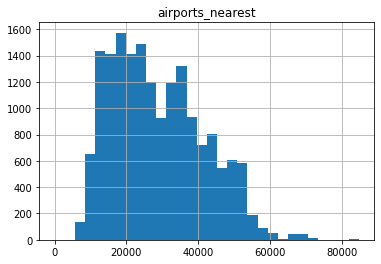

In [ ]:
#data['airports_nearest'].hist()
data.hist('airports_nearest', bins = 30)
plt.show()

Есть некоторое количество нулевых значений. Скорее всего такие значения могли появиться в силу того, что пользователи могли ставить 0, когда аэропорта не было рядом вообще. Уберем данные значения, чтоб не портить данные.

In [ ]:
data = data.loc[(data['airports_nearest'] > 1)]

In [ ]:
data['airports_nearest'].describe()

count    17383.000000
mean     28846.110280
std      12792.923519
min       6450.000000
25%      18412.500000
50%      26810.000000
75%      37434.000000
max      84869.000000
Name: airports_nearest, dtype: float64

##### cityCenters_nearest (расстояние до центра города (м))

In [ ]:
data['cityCenters_nearest'].describe()

count    17382.000000
mean     14504.923311
std       8577.512135
min        208.000000
25%       9841.000000
50%      13278.000000
75%      16464.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

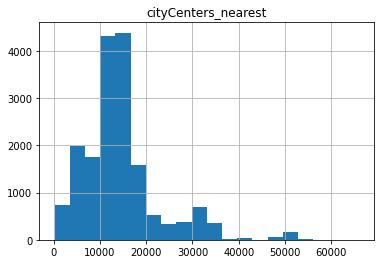

In [ ]:
#data['cityCenters_nearest'].hist()
data.hist('cityCenters_nearest', bins = 20)
plt.show()

Значительнеых логических выбросов нет, поэтому оставляем данные как есть.

##### parks_around3000 (число парков в радиусе 3 км)

In [ ]:
data['parks_around3000'].describe()

count    17383.000000
mean         0.583616
std          0.780406
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

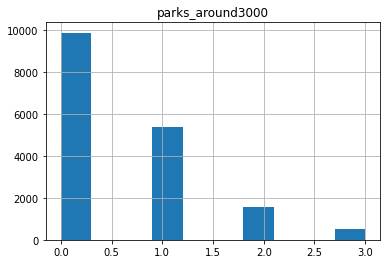

In [ ]:
#data['parks_around3000'].hist()
data.hist('parks_around3000', bins = 10)
plt.show()

Логических выбросов нет, поэтому оставляем данные как есть.

##### parks_nearest (расстояние до ближайшего парка (м))

In [ ]:
data['parks_nearest'].describe()

count    7503.000000
mean      493.917500
std       342.165475
min         1.000000
25%       290.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

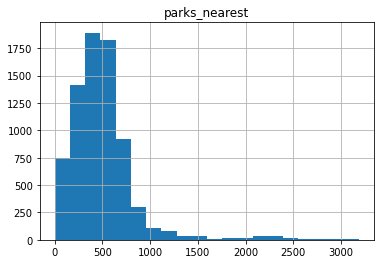

In [ ]:
#data['parks_nearest'].hist()
data.hist('parks_nearest', bins = 20)
plt.show()

Есть некоторое количество очень маленьких значений. Скорее всего такие значения могли появиться в силу того, что пользователи могуг жить прямо рядом с парком.

##### ponds_around3000 (число водоёмов в радиусе 3 км)

In [ ]:
data['ponds_around3000'].describe()

count    17383.000000
mean         0.740609
std          0.916908
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

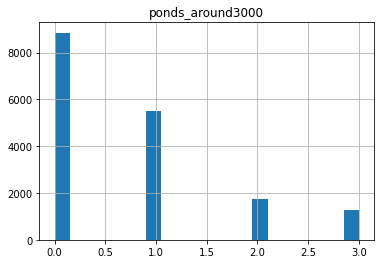

In [ ]:
#data['ponds_around3000'].hist()
data.hist('ponds_around3000', bins = 20)
plt.show()

Логических выбросов нет, поэтому оставляем данные как есть.

##### ponds_nearest (расстояние до ближайшего водоёма (м))

In [ ]:
data['ponds_nearest'].describe()

count    8532.000000
mean      525.165026
std       277.117736
min        13.000000
25%       304.000000
50%       511.000000
75%       735.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

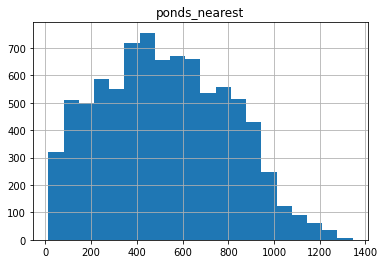

In [ ]:
#data['ponds_nearest'].hist()
data.hist('ponds_nearest', bins = 20)
plt.show()

Логических выбросов нет, поэтому оставляем данные как есть.

##### days_exposition (сколько дней было размещено объявление (от публикации до снятия))

In [ ]:
data['days_exposition'].describe()

count    15276.000000
mean       178.976368
std        219.769730
min          1.000000
25%         43.000000
50%         94.000000
75%        227.000000
max       1553.000000
Name: days_exposition, dtype: float64

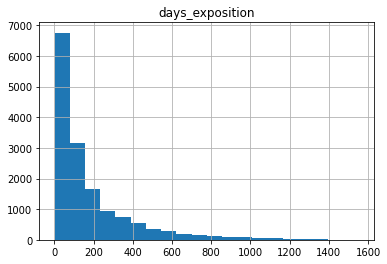

In [ ]:
#data['days_exposition'].hist()
data.hist('days_exposition', bins = 20)
plt.show()

In [ ]:
#data = data.loc[(data['days_exposition'] < 800)]

In [ ]:
#data['days_exposition'].describe()

In [ ]:
#data['days_exposition'].hist()

**Посмотрим на то, что получилось у нас в итоге предобработки данных**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17383 entries, 0 to 23697
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          17383 non-null  int64         
 1   last_price            17383 non-null  float64       
 2   total_area            17383 non-null  float64       
 3   first_day_exposition  17383 non-null  datetime64[ns]
 4   rooms                 17383 non-null  int64         
 5   ceiling_height        17383 non-null  float64       
 6   floors_total          17383 non-null  int64         
 7   living_area           17383 non-null  float64       
 8   floor                 17383 non-null  int64         
 9   is_apartment          17383 non-null  bool          
 10  studio                17383 non-null  bool          
 11  open_plan             17383 non-null  bool          
 12  kitchen_area          17383 non-null  float64       
 13  balcony         

In [ ]:
print(data.isna().sum())

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             40
airports_nearest           0
cityCenters_nearest        1
parks_around3000           0
parks_nearest           9880
ponds_around3000           0
ponds_nearest           8851
days_exposition         2107
is_apatrment               0
dtype: int64


**В ходе предобработки данных мы:**
- проработали большинство пропусков в данных. 
- предположили по каким причинам они могли возникнуть.
- выявили и откинули аномальные значения.
- проверили неявные дубликаты.

# 3. Посчитайте и добавьте в таблицу новые столбцы

Для дальнейшей работы с данными нам потребуются следующие столбцы:

- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [ ]:
#Расчитаем цену одного квадратного метра
data['PriceForMeter'] = data['last_price'] / data['total_area']

In [ ]:
#Расчитаем день недели публикации объявления
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

In [ ]:
#Расчитаем месяц публикации объявления
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [ ]:
#Расчитаем год публикации объявления
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [ ]:
#Расчитаем тип этажа квартиры (значения — «первый», «последний», «другой»);
def type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floors_total - floor == 0:
        return 'последний'
    else:
        return 'другой'
data['typefloor'] = data.apply(type, axis = 1)

In [ ]:
#Расчитаем расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
data['cityCenters'] = round(data['cityCenters_nearest'] / 1000, 0)

In [ ]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,is_apatrment,PriceForMeter,weekday,month,year,typefloor,cityCenters
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,True,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,NaN,81.0,True,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558.0,True,92785.714286,3,8,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,True,100000.000000,1,6,2018,другой,8.0
6,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,0,NaN,155.0,True,99195.710456,3,11,2017,другой,19.0
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,30.0,22,False,...,0,NaN,NaN,True,110544.692737,3,4,2019,другой,12.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,0,NaN,289.0,True,88524.590164,6,2,2017,другой,15.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,2,553.0,137.0,True,127525.252525,3,11,2017,другой,14.0
11,9,3300000.0,44.0,2018-08-27,2,2.65,5,31.0,4,False,...,0,NaN,7.0,False,75000.000000,0,8,2018,другой,52.0
13,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,False,...,3,298.0,366.0,True,82943.925234,5,7,2017,последний,33.0


Мы добавили некоторые расчетные столбцы для последующей аналитики данных, которые в дальнейшем помогут нам рассмотреть зависимости между разными факторами и ценой, сроком продажи квартиры.

# 4. Проведите исследовательский анализ данных

### Изучите следующие параметры объектов:
 
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

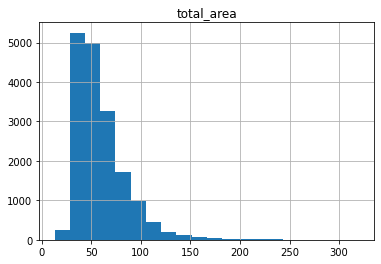

In [ ]:
#общая площадь
data.hist('total_area', bins = 20)
plt.show()

По данному графику можем заметить, что площадь большинства сдаваемых объектов находится в пределах 40-50 квадратных метров.  Есть так же достаточно маленькие значения - на графике видно, что есть объекты, в которых сдаваемая площадь менее 15 квадраных метров и очень большие значения - объекты площадью от 100 до 200 квадратных метров.

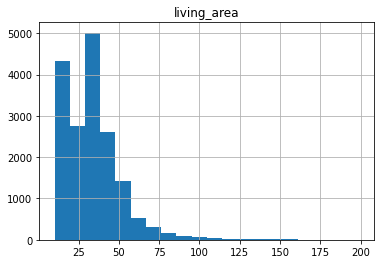

In [ ]:
#жилая площадь
data.hist('living_area', bins = 20)
plt.show()

На данном графике видим, что большинство сдаваемых объектов имеют жилую площадь в размере примерно 30 квадратных метров. Тут мы можем так же видеть то, что данные не имеют достаточного количества значений площади более 100 квадратных метров.

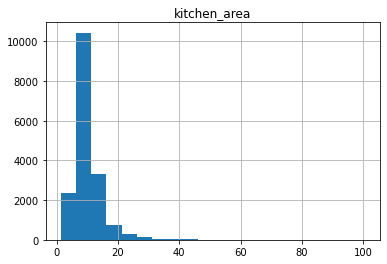

In [ ]:
#площадь кухни
data.hist('kitchen_area', bins = 20)
plt.show()

На данном графике большинство значений распределены в пределах от 0 до 20 квадратных метров и наибольшее число объектов имеет размер кухни в 10 квадратных метров. Значений более 30 квадратных метров практически нет.

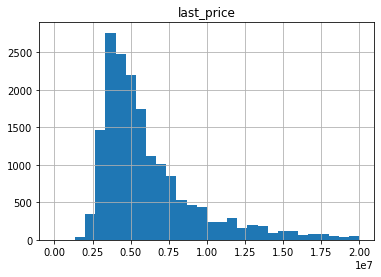

In [ ]:
#цена объекта
#data['last_price'].hist(bins = 30)
data.hist('last_price', bins = 30)
plt.show()

Размах стоимости квартир варьируется до 20 миллионов рублей. Большая часть объектов имеет стоимость от 2,5 млн.руб. до 7.5 млн.руб.

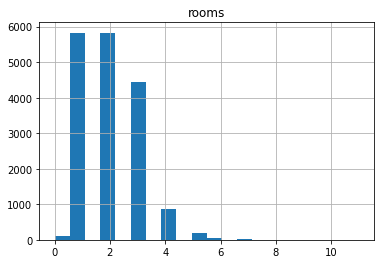

In [ ]:
#количество комнат
data.hist('rooms', bins = 20)
plt.show()

Большинство сдаваемых квартир имеют 1 комнату. Почти такое же количество объектов имеет по 2 комнаты.

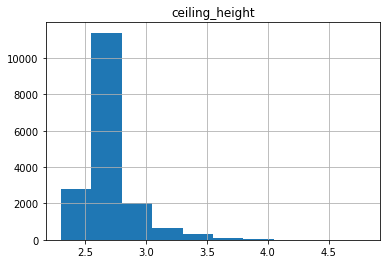

In [ ]:
#высота потолков
data.hist('ceiling_height', bins = 10)
plt.show()

В большинствах квартир высота потолка не превышает 2.75 метров. Однако, есть здания, в которых в квартирах высота потолка более трех метров. Выбросы это или нет сказать достаточно сложно.

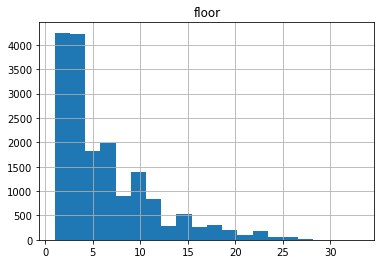

In [ ]:
#этаж квартиры
data.hist('floor', bins = 20)
plt.show()

Преобладающим большинством сдаваемых объектов являются квартиры, находящиеся не выше 10 этажа. Большинство квартир же находится все же на 1-4 этажах.

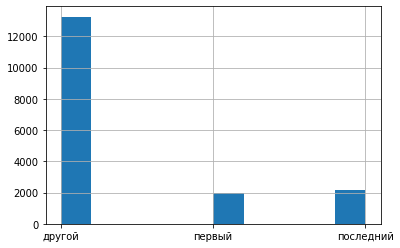

In [ ]:
#тип этажа квартиры
data['typefloor'].hist()

plt.show()

По графику можно заметить, что число сдаваемых квартир, расположенных на первом или последнем этажах значительно меньше тех, что находятся на других этажах.

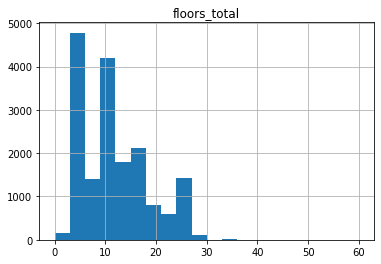

In [ ]:
#общее количество этажей в доме
data.hist('floors_total', bins = 20)
plt.show()

Судя по графику, становится понятно, почему большинства сдаваемых квартир находится до 5 этажа. Можно заметить, что большинство сдаваемых объектов в принципе имеет не более 10 этажей.

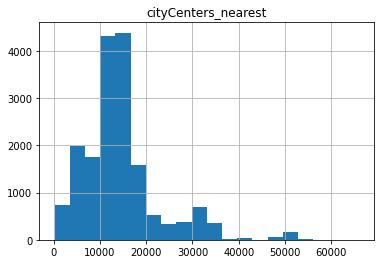

In [ ]:
#расстояние до центра города в метрах
data.hist('cityCenters_nearest', bins = 20)
plt.show()

На данном графики видно, что сдаваемые объекты часто находятся на расстоянии 10-20 км от центра города.

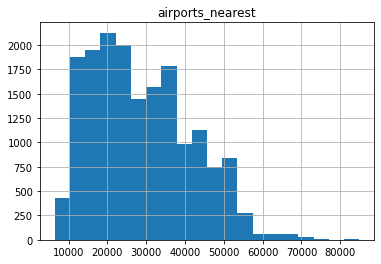

In [ ]:
#расстояние до ближайшего аэропорта
data.hist('airports_nearest', bins = 20)
plt.show()

С аэропортом дела обстоят иначе. Большое число зданий находится в 10-40 км от ближайшего аэропорта.

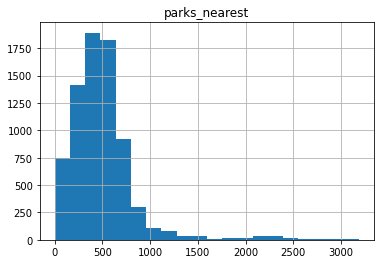

In [ ]:
#расстояние до ближайшего парка
data.hist('parks_nearest', bins = 20)
plt.show()

На данном графике графике можно заметить, что почти все здания находятся не так далеко от парков - не более 1 км.

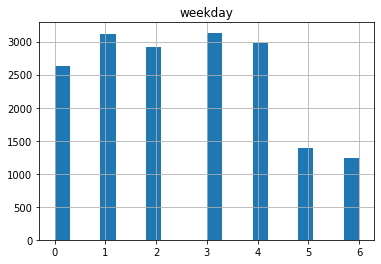

In [ ]:
#день и месяц публикации объявления
data.hist('weekday', bins = 20)
plt.show()

По графику можем обнаружить, что наибольшее число объявлений выкладывается в понедельник и вторник. Объявления в остальные дни недели распределены достаточно равномерно.

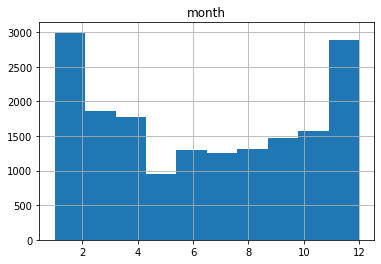

In [ ]:
#день и месяц публикации объявления
data.hist('month', bins = 10)
plt.show()

По данному графику можем заметить, что наиболее популярными месяцами для выставления объявлений являются декабрь и январь.

### Изучите, как быстро продавались квартиры (столбец days_exposition). 

Этот параметр показывает, сколько дней было размещено каждое объявление. 

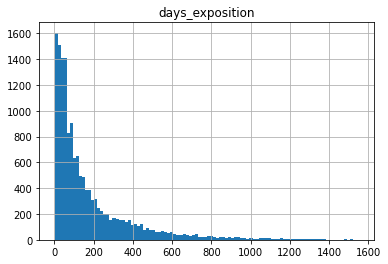

In [ ]:
#Постройте гистограмму.
data.hist('days_exposition', bins = 100)
plt.show()

In [ ]:
#Посчитайте среднее и медиану.
print("Среднее значение:", data['days_exposition'].mean())
print("Медианное значение:", data['days_exposition'].median())

Среднее значение: 178.976368159204
Медианное значение: 94.0


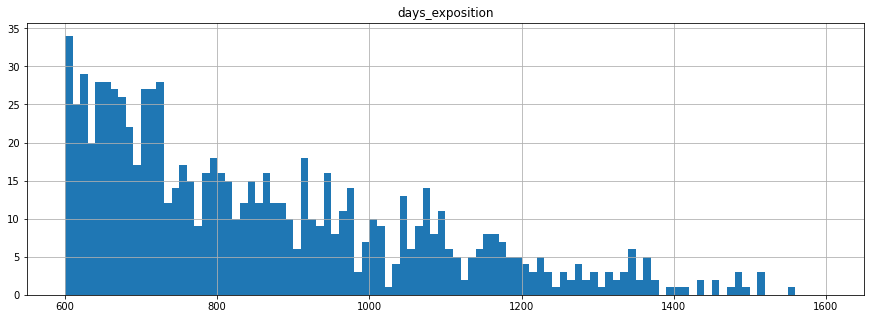

In [ ]:
data.hist('days_exposition', figsize=(15,5), bins=100, range=(600, 1600))
plt.show()

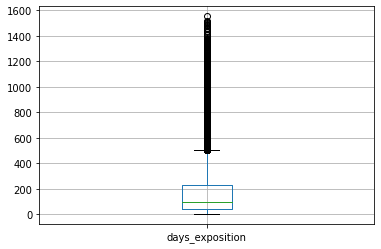

In [ ]:
data.boxplot('days_exposition')
plt.show()

Изучив график и расчетные значения, можно заметить, что большинство квартир продаются за первые 100 дней. Наиболее частым сроком продажи является 90 дней. Такие продажи можно считать достаточно быстрыми.
Медианное значение сильно отличается от среднего за счет обявлений, которые висели несколько лет. Такие продажи необычайно долгие по сравнению с остальными.

Рассмотрев более подбробно значения, выбивающиеся за рамки 600 дней, можем заметить, что тут достаточно большое количество объявлений, висевших более года. Построив график "ящик с усами" можем сделать вывод, что значеия, выходящие за третью квартиль - то есть объявления висящие более 200 дней, можно считать нетипичными и необычайно долгими.
Причинами необычайно долгих объявлений на мой взгляд могут быть следующие вещи:
- пользователь сам забыл снять объявление после продажи.
- завышенная цена жилья.
- жилье в плохом состоянии.
- была допущена ошибка в значениях при их сборе.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

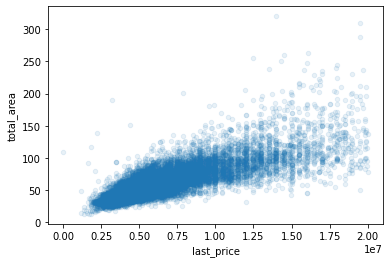

In [ ]:
#общая площадь

data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1)
plt.show()

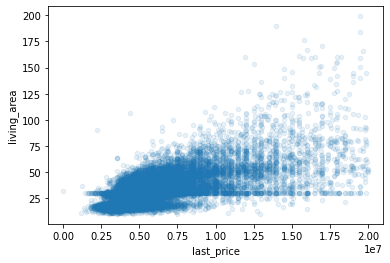

In [ ]:
#жилая площадь

data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.1)
plt.show()

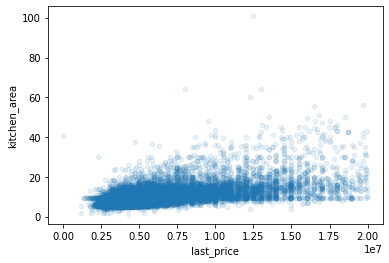

In [ ]:
#площадь кухни

data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.1)
plt.show()

Если рассматривать графики зависимости площадей - общей, жилой и кухни, то можно заметить, что графики имеют примерно одинаковую структуру. По данному расположению значений можно сделать вывод, что цена в полной мере зависит от размера помещения.

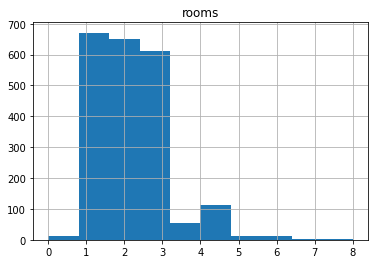

In [ ]:
#количество комнат

data.pivot_table('rooms', 'last_price').hist()
plt.show()

На данном графике можно видеть, что стоимость разных однокомнатных квартир достаточно отличается. Так что сделать вывод, что цена зависит от количества комнат в квартире однозначно нельзя.

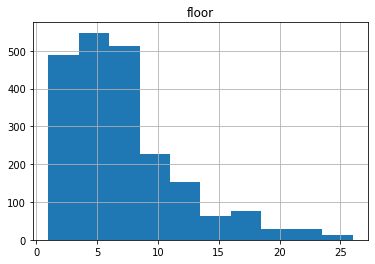

In [ ]:
#этаж
data.pivot_table('floor', 'last_price').hist()
plt.show()

По данному графику видно, что стоимость квартир примерно до 7 этажа значительно выше, чем на этажах выше. Можно сделать вывод, что цена зависит от этажа квартры.

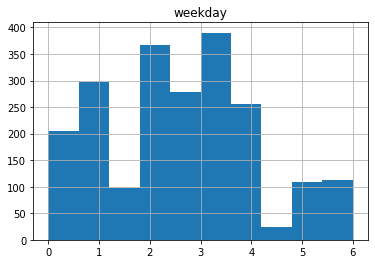

In [ ]:
#день недели
data.pivot_table('weekday', 'last_price').hist()
plt.show()

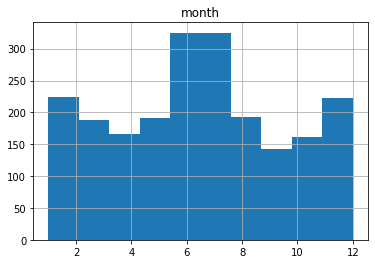

In [ ]:
#месяц
data.pivot_table('month', 'last_price').hist()
plt.show()

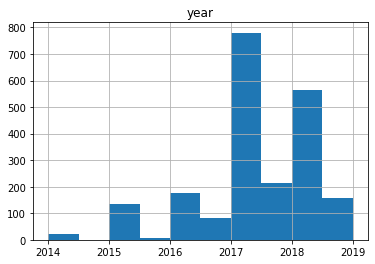

In [ ]:
#год
data.pivot_table('year', 'last_price').hist()
plt.show()

Если рассматривать зависиморсть цены от времени публикации объялений, то можно сделать вывод, что наиболее дорогие квартиры, публикуемые в среду или пятницу, в середине года в 2017 году.

### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [ ]:
location10 = data.pivot_table(index = 'locality_name', values = ['last_price', 'total_area'], aggfunc = ['sum','count'])
location10.columns = ['sum_price', 'sum_area', 'count_price', 'count_area']
location10 = location10.sort_values('count_area', ascending = False)
location10

,sum_price,sum_area,count_price,count_area
locality_name,,,,
Санкт-Петербург,9.576045e+10,886681.18,14886,14886
поселок Шушары,1.790256e+09,23483.96,435,435
Пушкин,2.120007e+09,20754.58,359,359
Колпино,1.299989e+09,17609.14,336,336
поселок Парголово,1.467600e+09,16847.50,327,327
Петергоф,8.451920e+08,10061.35,199,199
Сестрорецк,1.129598e+09,11386.06,180,180
Красное Село,6.477960e+08,9423.60,174,174
Ломоносов,4.835630e+08,6766.20,132,132


In [ ]:
location10 = location10.head(10)
location10['meter_price'] = location10['sum_price']/location10['sum_area']
location10 = location10.sort_values(by = 'meter_price', ascending = False)
location10

/tmp/ipykernel_591/702531140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location10['meter_price'] = location10['sum_price']/location10['sum_area']


,sum_price,sum_area,count_price,count_area,meter_price
locality_name,,,,,
Санкт-Петербург,9.576045e+10,886681.18,14886,14886,107998.741428
Пушкин,2.120007e+09,20754.58,359,359,102146.464250
Сестрорецк,1.129598e+09,11386.06,180,180,99208.895790
поселок Парголово,1.467600e+09,16847.50,327,327,87110.874551
Петергоф,8.451920e+08,10061.35,199,199,84003.836463
Кронштадт,3.896170e+08,4947.00,94,94,78758.237113
поселок Шушары,1.790256e+09,23483.96,435,435,76233.139513
Колпино,1.299989e+09,17609.14,336,336,73824.686839
Ломоносов,4.835630e+08,6766.20,132,132,71467.441104


<AxesSubplot:xlabel='locality_name'>

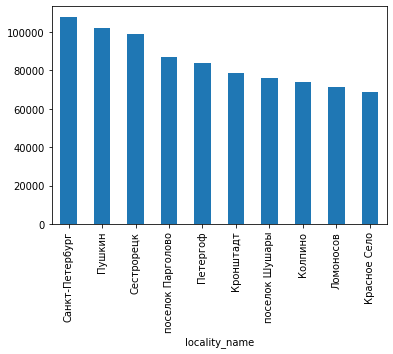

In [ ]:
location10['meter_price'].plot(kind='bar')

На получившемся графике мы видим, что наибольшая стоимость квадратного метра в Санкт-Петербурге. Недалеко от него располагаются Пушкин и Сестрорецк. Наименьшая же стоимость квадратного метра в Красном Селе.

### Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. 
Опишите, как стоимость объектов зависит от расстояния до центра города.

<AxesSubplot:xlabel='cityCenters'>

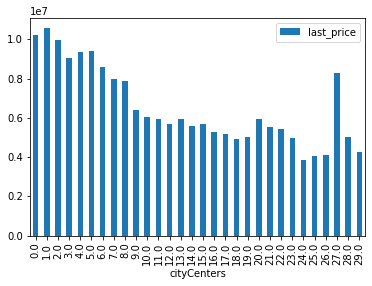

In [ ]:
data[data['locality_name'] == "Санкт-Петербург"].pivot_table(index = 'cityCenters', values = 'last_price', aggfunc = 'mean').plot(kind='bar')


По данному графику видно, что наибольшая цена у жилья, находящегося примерно в 1 киллометре от центра города, далее идет плавный спад цены по мере удаления от центра города. Так же в данных можно заметить выброс на значении 27 киллометров и снова убывающую цену после него.

### Итог

Проведя исследовательский анализ данных мы: 
- Рассмотрели различые параметры данных, построили для них графики. 
- Изучили с какой скоростью обычно продаются квартиры и что можно считать быстрой продажой, а что необычайно долгой. 
- Изучили факоры, которые могут влиять на стоимость жилья.
- Выявили города с наиболее дорогой недвижимостью.
- Рассмотрели как расстояние до центра города влияет на стоимость квадратного метра жилья.

# 5. Общий вывод

Прежде чем проводить исследовательский анализ данных мы достаточно хорошо подготовили для этого данные:
- Изучили состав дата сета.
- Получили информацию об имеющихся типах данных.
- Нашли где есть пропущенные значения.
- Выдвинули предположения о причине пропущенных значений.
- Обработали большинство пропущенных значений.
- Изменили типы данных в столбцах, где было нужно.
- Выявили неявные дубликаты.
- Добавили необходимые столбцы для последующего анализа.

В итоге предобработки данных были выдвинуты следующие предположения о причанах возникших пропусков. Большая часть значений имела численный характер. Например, расстояние до ближайшего аэропорта, центра города, парка или пруда люди могут либо не знать, либо поблизости просто нет этих объектов, чтоб указать расстояние для них за счет чего люди могут оставлять эти поля пустыми.

Так же большое количество пропущенных значений имел столбец с булевым типом, обозначающий признак апартаментов. Такой пропуск может быть вызван либо человеческим фактором (например, сдаваемое жилье не является апартаментами и человек не знал как это указать), либо техническим фактором (проблемы с указанием типа сдаваемого жилья). Пропуски в столбцах с размерами жилья или кухни тоже скорее всего возникли из-за человеческого фактора, когда хозяева не могли точно знать размеры сдаваемой площади.

После предобработки данных мы приступили непосредственно к исследовательскому анализу данных. Перед нами стояла задача рассмотреть какие факторы и как влияют на стоимость сдаваемого жилья. 
- Мы выявили наиболее дорогие для покупки жилья города. Наиболее дорогим для покупки жилья является город санкт-Петербург. Именно в этом городе оказалась самая большая цена за квадратный метр.
- Выявили, что можно считать быстрой продажей, а что чрезвычайно долгой. Быстрые продажи происходили в среднем за 90 дней. Наебычайно долгие продажи у объявлений, которые по несколько лет висят на продаже.
- Выяснили, как зависит цена от удаленности от центра. В городе Санкт-Петербург
